In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import pickle
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
messages = pd.read_csv('SMS_data', sep='\t',names=['label','message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


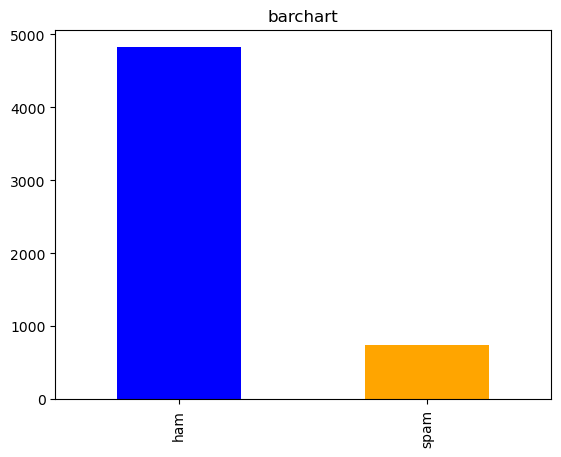

In [4]:
count_Class = pd.value_counts(messages['label'],sort=True)
count_Class.plot(kind='bar', color=['blue','orange'])
plt.title('barchart')
plt.show()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
lm = WordNetLemmatizer()
data = []

for i in range(0, len(messages)):
    data_review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    data_review = data_review.split()
    data_review = [lm.lemmatize(word) for word in data_review if not word in stopwords.words('english')]
    data_review = " ".join(data_review)
    data.append(data_review)

In [7]:
messages['cleaned_messages'] = data

In [8]:
messages

,label,message,cleaned_messages
0,ham,"Go until jurong point, crazy.. Available only ...",Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry wkly comp win FA Cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This nd time tried contact u U Pound prize cla...
5568,ham,Will ü b going to esplanade fr home?,Will b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity mood So suggestion
5570,ham,The guy did some bitching but I acted like i'd...,The guy bitching I acted like interested buyin...


In [16]:
ham_data = messages.loc[messages['label']=='ham']
ham_data = ham_data.drop(['label','message'],axis=1)
spam_data = messages.loc[messages['label']=='spam']
spam_data = spam_data.drop(['label','message'],axis=1)

In [17]:
ham_data

,cleaned_messages
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
3,U dun say early hor U c already say
4,Nah I think go usf life around though
6,Even brother like speak They treat like aid pa...
...,...
5565,Huh lei
5568,Will b going esplanade fr home
5569,Pity mood So suggestion
5570,The guy bitching I acted like interested buyin...


In [18]:
spam_data

,cleaned_messages
2,Free entry wkly comp win FA Cup final tkts st ...
5,FreeMsg Hey darling week word back I like fun ...
8,WINNER As valued network customer selected rec...
9,Had mobile month U R entitled Update latest co...
11,SIX chance win CASH From pound txt CSH send Co...
...,...
5537,Want explicit SEX sec Ring Costs p min Gsex PO...
5540,ASKED MOBILE IF CHATLINES INCLU IN FREE MINS I...
5547,Had contract mobile Mnths Latest Motorola Noki...
5566,REMINDER FROM O To get pound free call credit ...


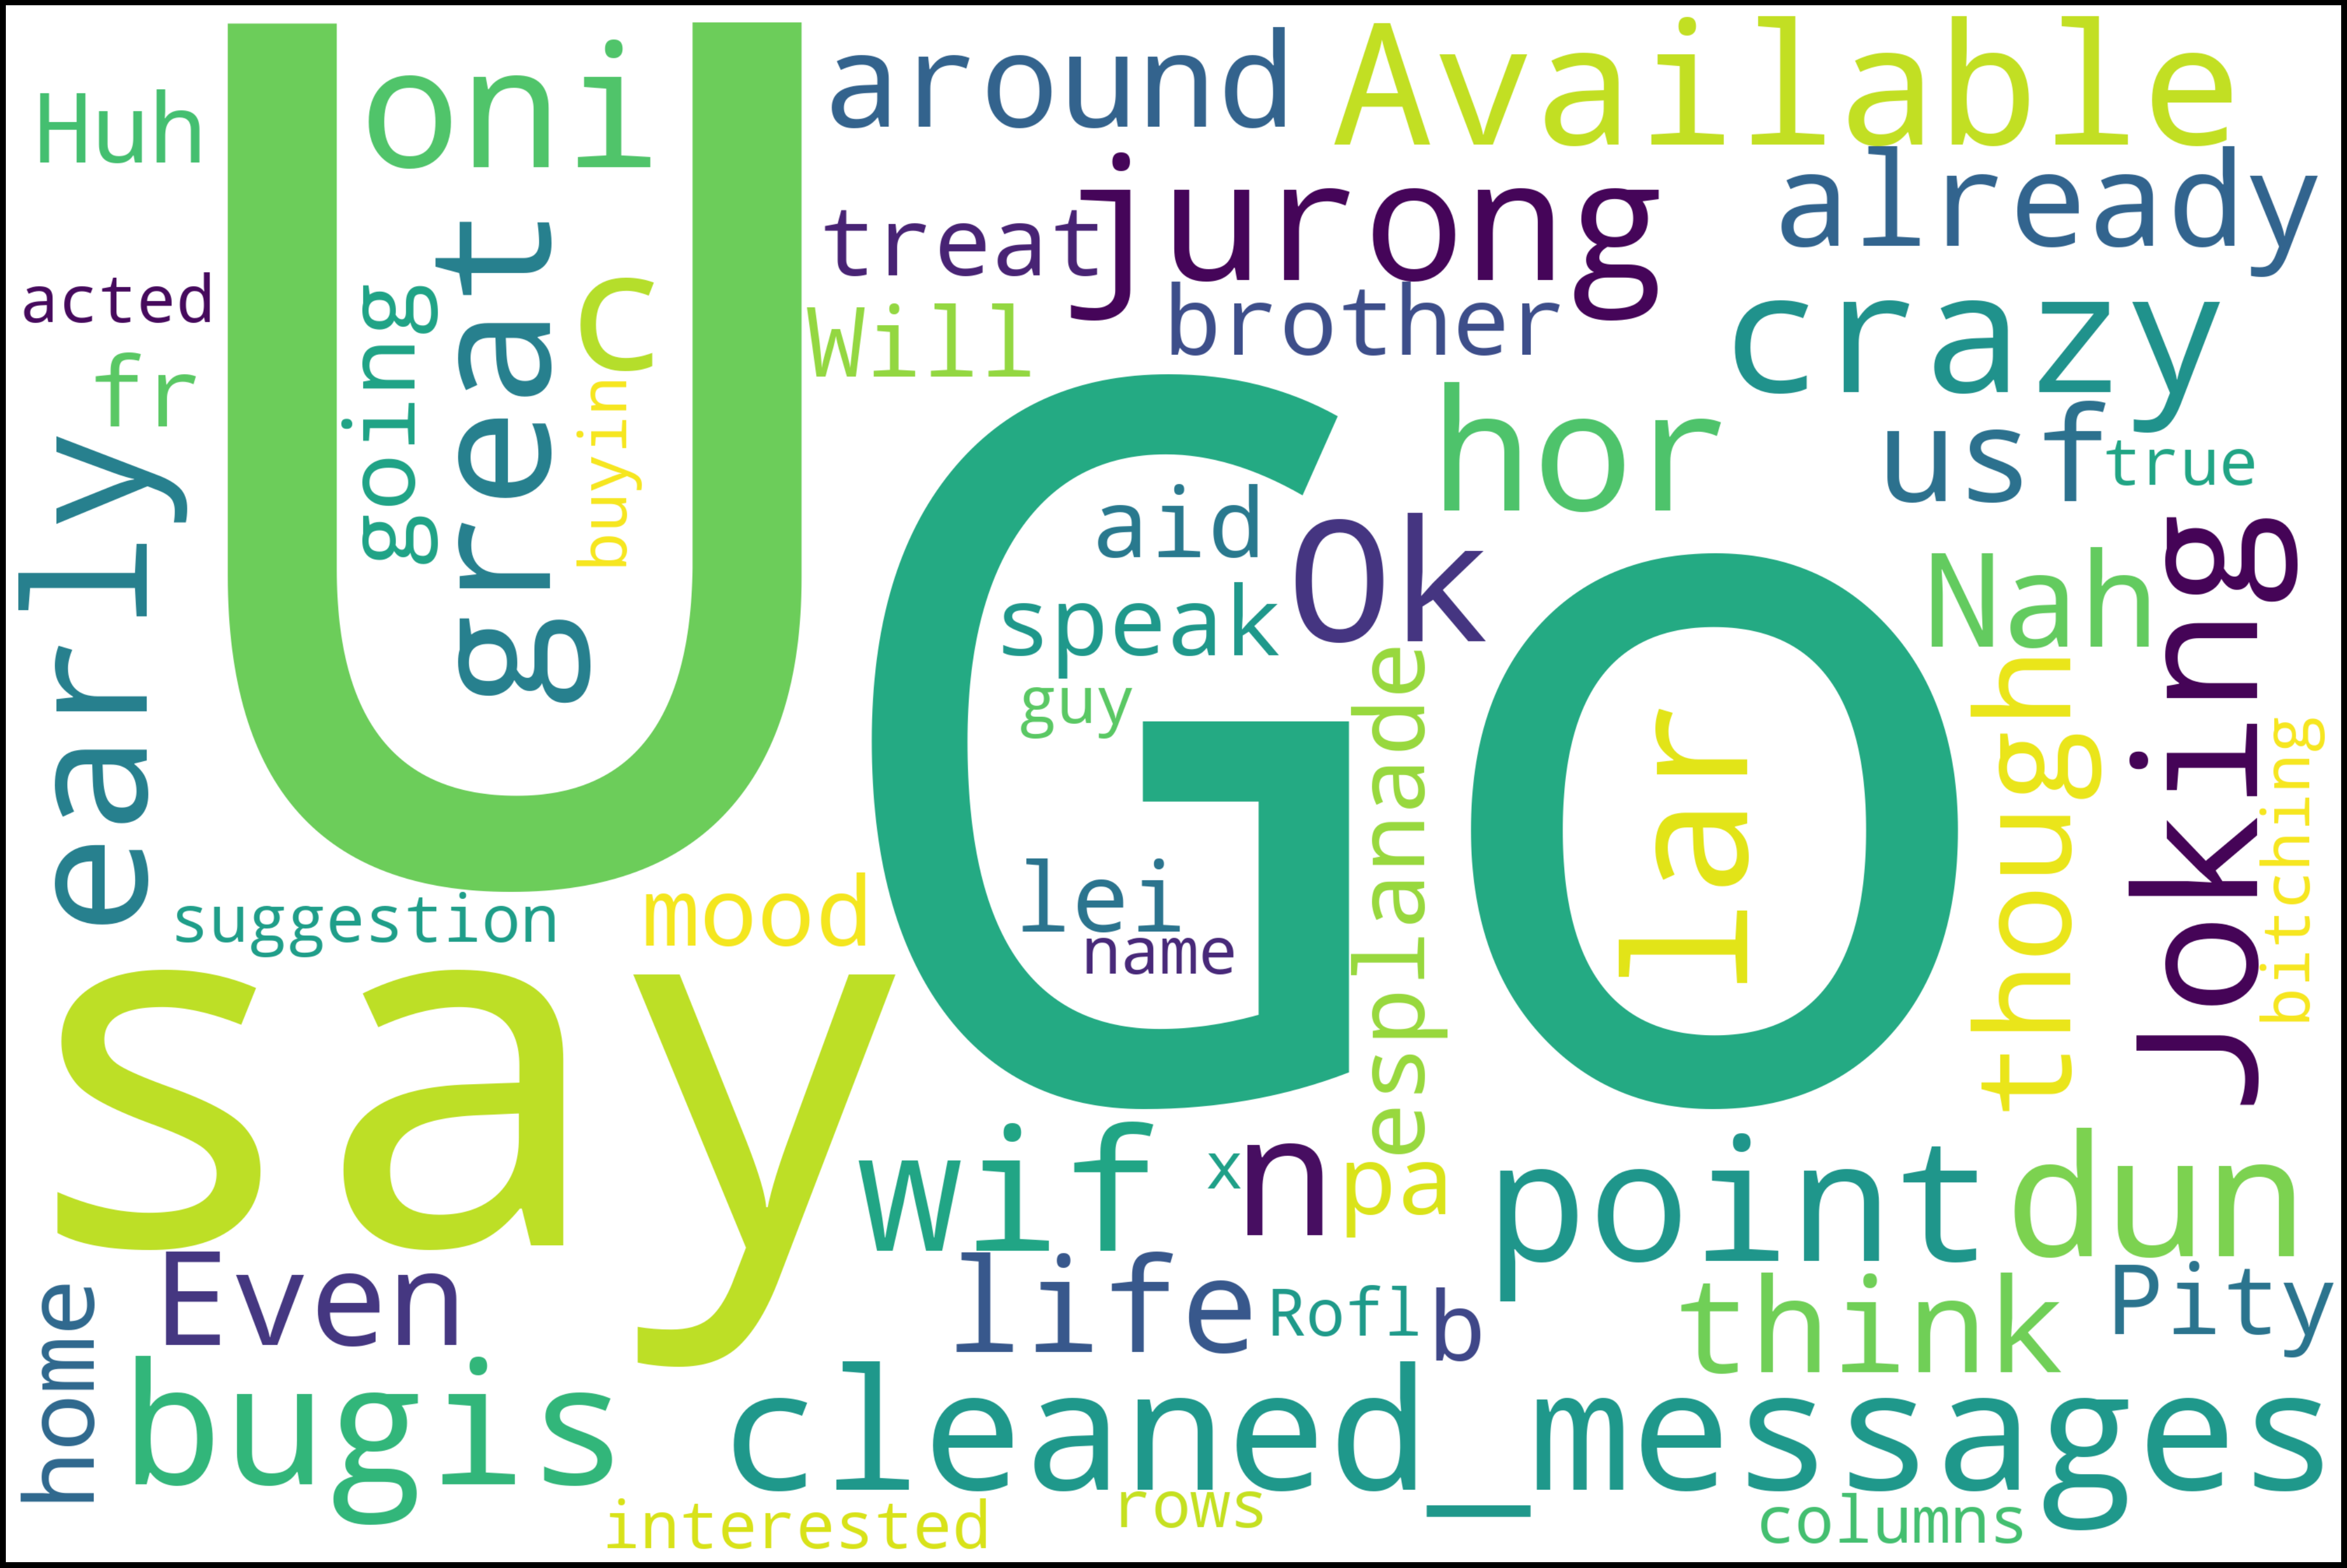

<Figure size 640x480 with 0 Axes>

In [20]:
#text vectoration

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ham_data

wordcloud = WordCloud(
    
    width = 3000,
    height= 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize=(40,30),
    facecolor = 'k',
    

)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show('off')
plt.tight_layout(pad=0)
plt.show()

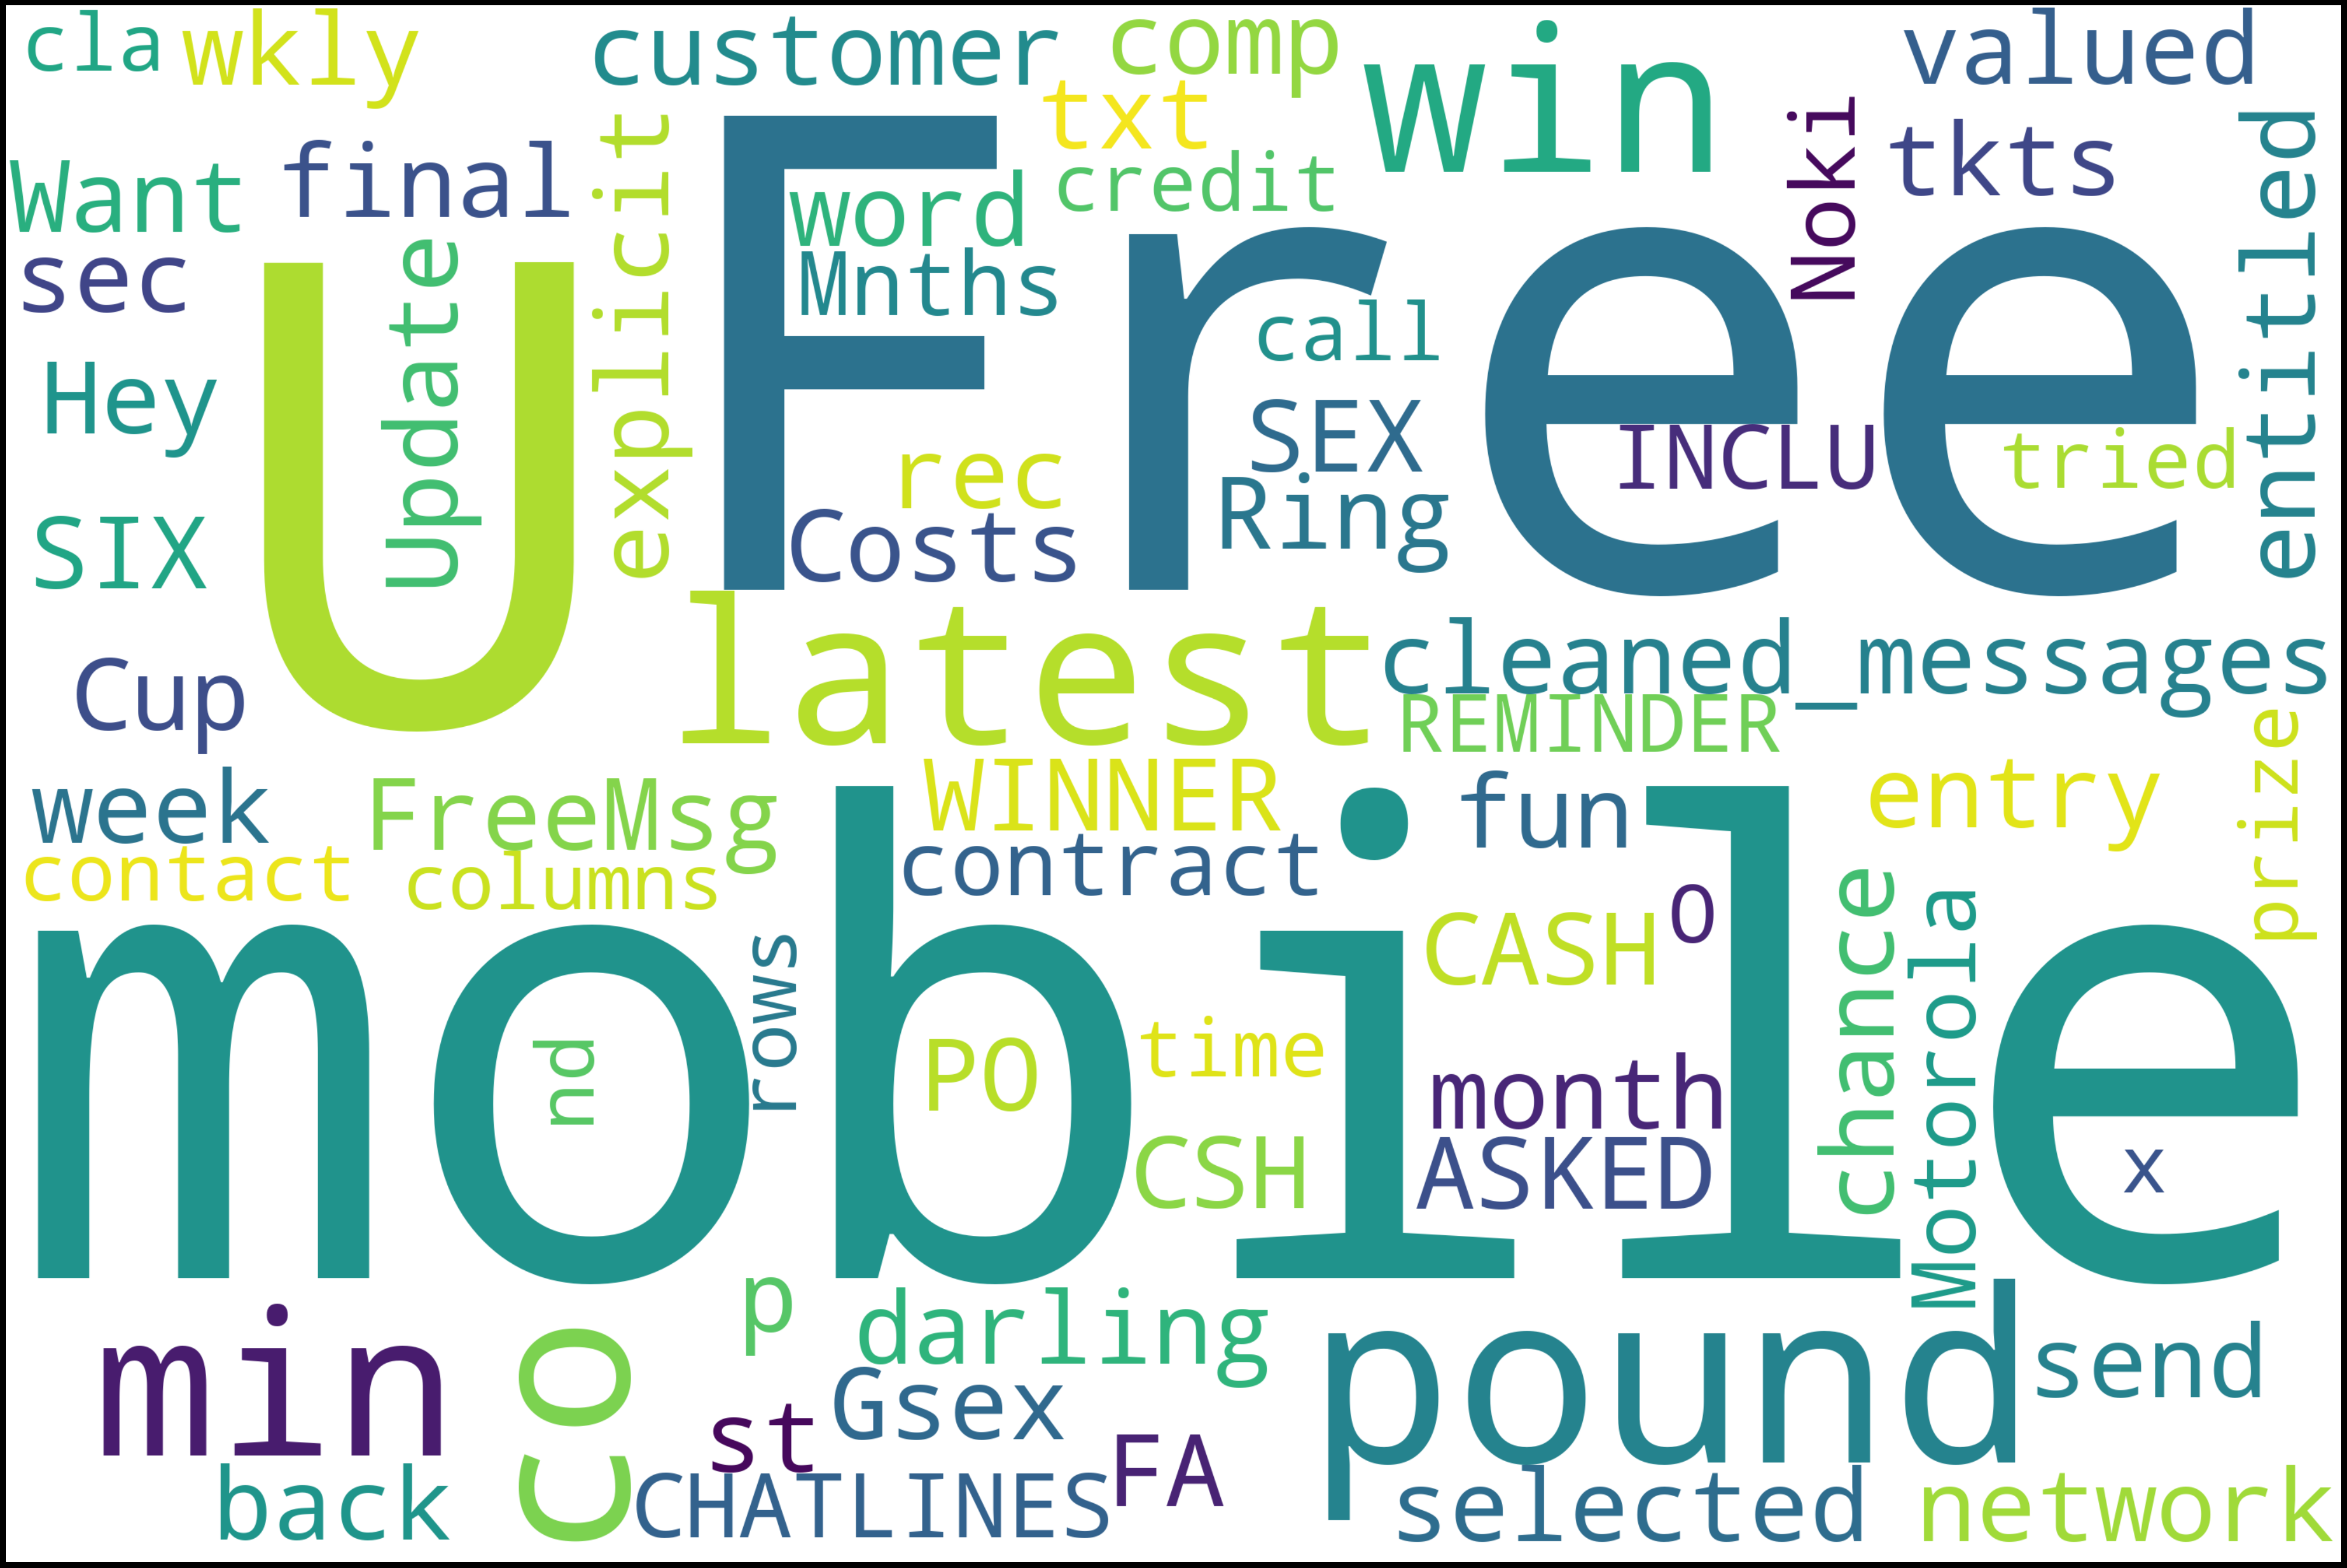

<Figure size 640x480 with 0 Axes>

In [21]:

text = spam_data

wordcloud = WordCloud(
    
    width = 3000,
    height= 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize=(40,30),
    facecolor = 'k',
    

)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
x = cv.fit_transform(data)
pickle.dump(cv, open("cv.pickle","wb"))

In [27]:
#bag of word using tf-idf model

In [30]:
y =pd.get_dummies(messages['label'])
y = y.iloc[:,1]
b = y.tolist()
b.count(1)

747

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
x_train.shape

(4457, 3000)

In [32]:
#model selection

from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.naive_bayes import MultinomialNB

mulNB = MultinomialNB(alpha=3.0)
score = cross_val_score(mulNB, x,y, cv=5, scoring = 'accuracy').mean()
score

#data acquire, preprocess, split, model selectionselected model hyperparameter tuning, train, test and eval


0.9833088856864529

In [37]:
from sklearn.svm import SVC

svc = SVC()
score = cross_val_score(svc, x,y, cv=5, scoring='accuracy').mean()
score

0.9775662380948548

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
score = cross_val_score(knn, x, y, cv=5, scoring='accuracy').mean()
score

/Users/avigyarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/avigyarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

0.9221109241532552

In [41]:
#model training

from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB(alpha=3.0).fit(x_train, y_train)

In [45]:
spam_detect_model.score(x_test, y_test)

0.9919282511210762

In [47]:
y_pred = spam_detect_model.predict(x_test)
print(y_pred)

[1 0 1 ... 0 1 0]


In [48]:
#confusion matrix

c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

[[966   4]
 [  5 140]]


<AxesSubplot:>

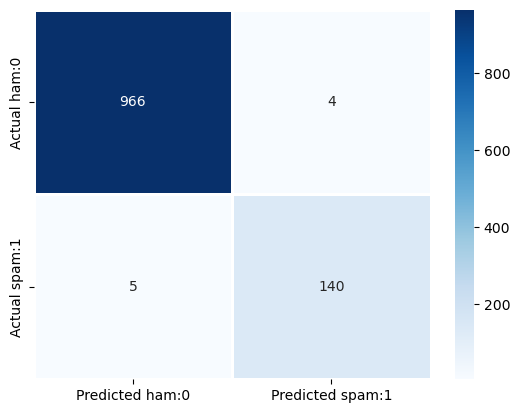

In [50]:
#visualising confusion matrix

cm_matrix = pd.DataFrame(data=c_matrix, columns = ['Predicted ham:0','Predicted spam:1'],
                        index=['Actual ham:0','Actual spam:1'])
sns.heatmap(cm_matrix, annot= True, fmt='d',cmap='Blues',linewidths=1)

In [52]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       970
           1       0.97      0.97      0.97       145

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9919282511210762


In [68]:
b = spam_detect_model.predict_proba(x_test)
value = b[:,1]
value

array([1.00000000e+00, 1.80741417e-03, 1.00000000e+00, ...,
       4.46970106e-05, 1.00000000e+00, 1.38176726e-02])

In [65]:
pickle.load(open("cv.pickle",'rb'))

CountVectorizer(max_features=3000)

In [69]:
#roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, spam_detect_model.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, value)
auc

0.9806967650195522

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='multinomial NB model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()
plt.sa